In [226]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
font = {'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)
import os
from adjustText import adjust_text as atext

In [227]:
os.getcwd()

'd:\\Github\\HSE-FF\\6th semester\\Cathedral Lab'

In [228]:
data_1 = pd.read_csv('Auge data/group4_1.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
data_1.head()

<ipython-input-228-1fb80fb70434>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_1 = pd.read_csv('Auge data/group4_1.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
<ipython-input-228-1fb80fb70434>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_1 = pd.read_csv('Auge data/group4_1.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)


,E,der
0,40.028,-380.8
1,40.251,-383.2
2,40.474,-381.3
3,40.698,-374.1
4,40.921,-362.6


In [229]:
float(data_1['E'][0])

40.028

In [230]:
data_2 = pd.read_csv('Auge data/group4_2.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
data_2.head()

<ipython-input-230-9fee6787f4b3>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_2 = pd.read_csv('Auge data/group4_2.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
<ipython-input-230-9fee6787f4b3>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_2 = pd.read_csv('Auge data/group4_2.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)


,E,der
0,1000.012,-56.5
1,1000.235,-57.2
2,1000.458,-58.3
3,1000.682,-62.9
4,1000.905,-55.5


In [231]:
data_3 = pd.read_csv('Auge data/group4_3.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
data_3.head()

<ipython-input-231-c73536098a33>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_3 = pd.read_csv('Auge data/group4_3.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
<ipython-input-231-c73536098a33>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_3 = pd.read_csv('Auge data/group4_3.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)


,E,der
0,19.957,-517.8
1,20.181,-601.0
2,20.404,-596.8
3,20.627,-567.5
4,20.851,-528.0


In [232]:
data_4 = pd.concat((data_1, data_2))
data_4.head()

,E,der
0,40.028,-380.8
1,40.251,-383.2
2,40.474,-381.3
3,40.698,-374.1
4,40.921,-362.6


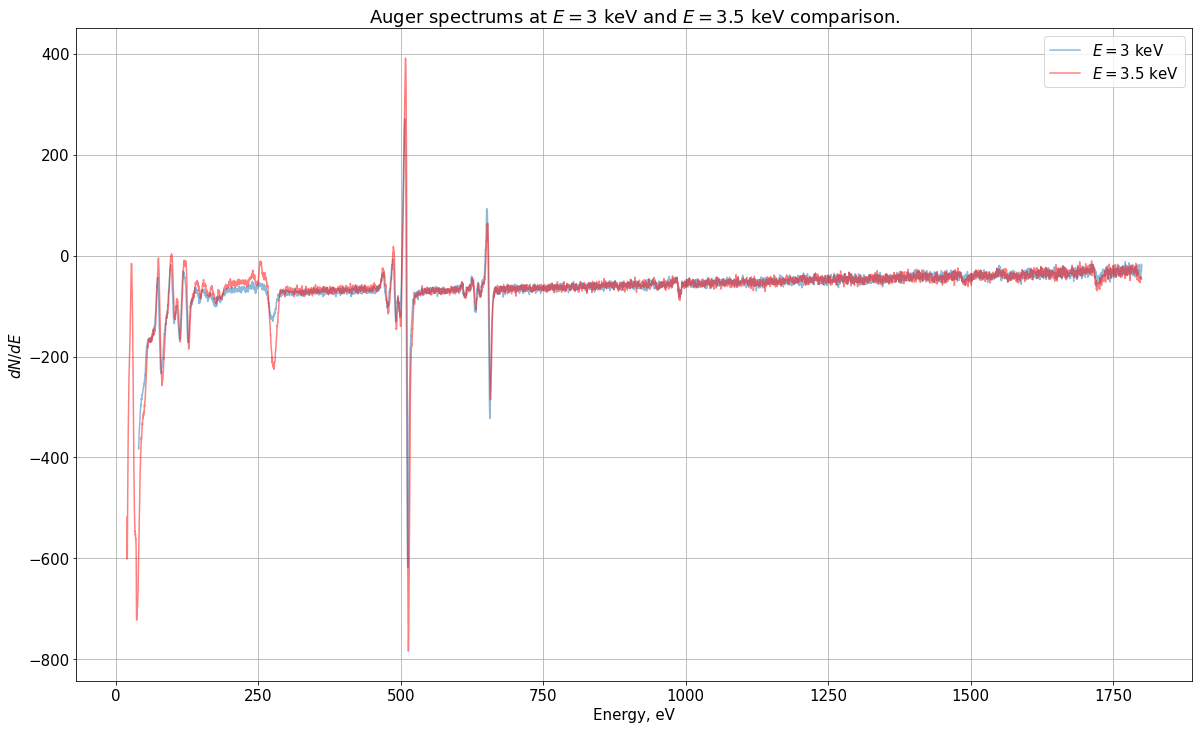

In [233]:
plt.figure(figsize=(20, 12))


plt.plot(data_4['E'].values, data_4['der'].values, alpha=0.5, label='$E=3$ keV')
plt.plot(data_3['E'].values, data_3['der'].values, color='red', alpha=0.5, label='$E=3.5$ keV')

plt.xlabel('Energy, eV')
plt.ylabel('$dN/dE$')
plt.title('Auger spectrums at $E = 3$ keV and $E = 3.5$ keV comparison.')
plt.legend()

plt.grid()
plt.savefig('Report/Pictures/1_Auge_double.pdf')

plt.show()

In [234]:
# Trying to filter some shit
from scipy.signal import lfilter

n = 25  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

from scipy.signal import find_peaks

## 3000 eV analysis

In [235]:
indexes = find_peaks(-1 * lfilter(b, a, data_4['der'].values), height=30, prominence=15, threshold=0)[0]
data_4['E'].values[indexes], indexes

(array([  45.387,   83.124,  114.386,  130.24 ,  150.337,  177.356,
         277.616,  479.477,  495.108,  515.874,  614.795,  633.552,
         659.901,  992.614, 1725.505]),
 array([  24,  193,  333,  404,  494,  615, 1064, 1968, 2038, 2131, 2574,
        2658, 2776, 4266, 7549], dtype=int64))

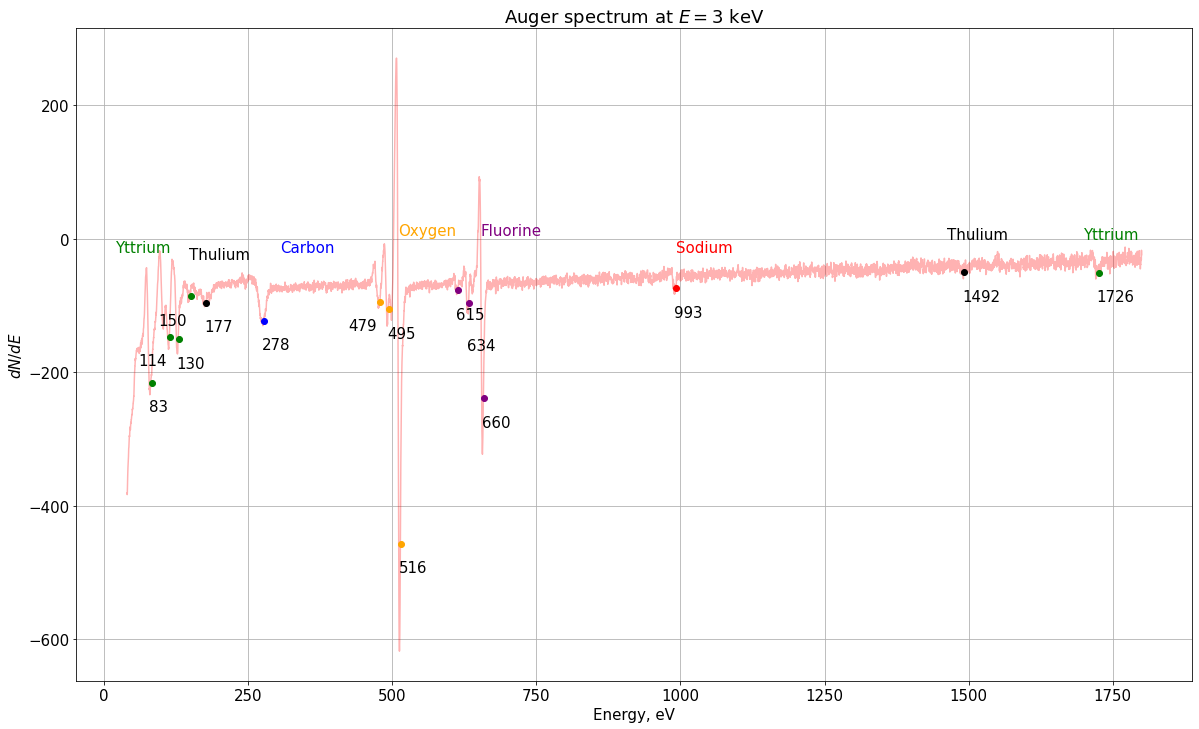

In [236]:
plt.figure(figsize=(20, 12))

#plt.plot(data_4['E'].values, lfilter(b, a, data_4['der'].values), color='black')
plt.plot(data_4['E'].values, data_4['der'].values, color='red', alpha=0.3)
#plt.plot(data_4['E'].values[indexes], lfilter(b, a, data_4['der'].values)[indexes], 'o')

plt.plot(data_4['E'].values[indexes][7:10], lfilter(b, a, data_4['der'].values)[indexes][7:10], 'o', color='orange') # Oxygen

plt.plot(data_4['E'].values[indexes][6], lfilter(b, a, data_4['der'].values)[indexes][6], 'o', color='blue') # Carbon

plt.plot(data_4['E'].values[indexes][10:13], lfilter(b, a, data_4['der'].values)[indexes][10:13], 'o', color='purple') # Fluorine

plt.plot(data_4['E'].values[indexes][13], lfilter(b, a, data_4['der'].values)[indexes][13], 'o', color='red') # Sodium
#plt.plot(data_4['E'].values[indexes][0], lfilter(b, a, data_4['der'].values)[indexes][0], 'o', color='red') # Sodium

plt.plot(data_4['E'].values[indexes][1:5], lfilter(b, a, data_4['der'].values)[indexes][1:5], 'o', color='green') # Yttrium
plt.plot(data_4['E'].values[indexes][-1], lfilter(b, a, data_4['der'].values)[indexes][-1], 'o', color='green') # Yttrium

plt.plot(data_4['E'].values[indexes][5], lfilter(b, a, data_4['der'].values)[indexes][5], 'o', color='black')
plt.plot(1492, -50, 'o', color='black')

atext([plt.text(1492-5, -50-50, 1492)], color='orange')

x_temp = data_4['E'].values[indexes]
texts = [plt.text(x_temp[i] - 5, lfilter(b, a, data_4['der'].values)[indexes][i] - 50, round(x_temp[i])) for i in range(1, len(x_temp))]
atext(texts, color='orange')

plt.annotate('Carbon', (275+30, -20), color='blue')
plt.annotate('Oxygen', (510, 5), color='orange')
plt.annotate('Fluorine', (652.37120047, 5), color='purple')
plt.annotate('Sodium', (993, -20), color='red')
plt.annotate('Yttrium', (120-100, -20), color='green')
plt.annotate('Yttrium', (1700, 0), color='green')
plt.annotate('Thulium', (177-30, -30), color='black')
plt.annotate('Thulium', (1492-30, 0), color='black')

plt.xlabel('Energy, eV')
plt.ylabel('$dN/dE$')
plt.title('Auger spectrum at $E = 3$ keV')


plt.grid()

plt.savefig('Report/Pictures/1_Auge_3000.pdf')
plt.show()

## Recalibrating

In [237]:
# New book
A = 47000 / 47473
B = -88569 / 47473 

# Old book

#AA = 
#BB = 

In [238]:
def recalib(x, a=A, b=B):
    return x * a + b

In [239]:
#data_3['E'] = recalib(data_3['E'])

In [240]:
indexes = find_peaks(-1 * lfilter(b, a, data_3['der'].values), height=30, prominence=15, threshold=0)[0]
data_3['E'].values[indexes].round()#, indexes

array([  25.,   41.,   85.,  116.,  132.,  152.,  179.,  250.,  280.,
        481.,  496.,  517.,  616.,  635.,  661.,  992., 1492., 1727.])

In [241]:
 data_3['der'].values[4355] / data_3['der'].values[92] * 100

12.88141470180305

In [242]:
#data_3['E'].values[4355]

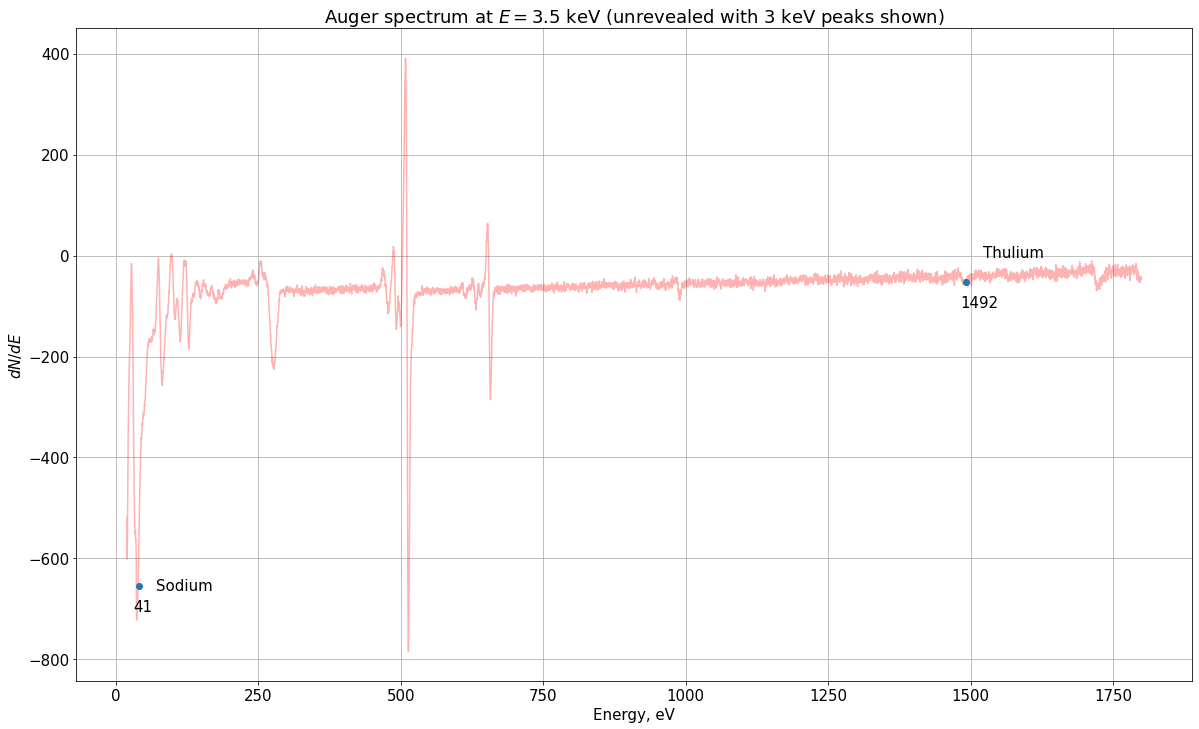

In [243]:
plt.figure(figsize=(20, 12))

#plt.plot(data_3['E'].values, lfilter(b, a, data_3['der'].values), color='black')
plt.plot(data_3['E'].values, data_3['der'].values, color='red', alpha=0.3)
plt.plot([data_3['E'].values[indexes][i] for i in [1, -2]], [lfilter(b, a, data_3['der'].values)[indexes][i] for i in [1, -2]], 'o')

plt.annotate('Sodium', (data_3['E'].values[indexes][1] + 30, lfilter(b, a, data_3['der'].values)[indexes][1] - 10))
plt.annotate('41', (data_3['E'].values[indexes][1] - 10, lfilter(b, a, data_3['der'].values)[indexes][1] - 50))

plt.annotate('Thulium', (data_3['E'].values[indexes][-2] + 30, lfilter(b, a, data_3['der'].values)[indexes][-2] +50))
plt.annotate('1492', (data_3['E'].values[indexes][-2] - 10, lfilter(b, a, data_3['der'].values)[indexes][-2]- 50))

plt.xlabel('Energy, eV')
plt.ylabel('$dN/dE$')
plt.title('Auger spectrum at $E = 3.5$ keV (unrevealed with 3 keV peaks shown)')


plt.grid()

plt.savefig('Report/Pictures/1_Auge_3500.pdf')
plt.show()

In [244]:
#pd.read_csv('Data_STS/Series_3.txt', skiprows=25, delimiter='   ')
data_STS = np.genfromtxt('STS data/Series 3.txt', skip_header=25)
data_STS[:5]

array([[-5.0000e+02, -1.0700e+01, -7.8320e+00, -1.0700e+01, -1.0700e+01,
        -1.0700e+01, -2.7000e-01, -5.6000e-02, -2.5100e-01, -3.0100e-01,
        -4.3600e-01,  4.5747e+01,  4.5750e+01,  4.5754e+01,  4.5755e+01,
         4.5745e+01,  4.5752e+01,  4.5768e+01,  4.5757e+01,  4.5751e+01,
         4.5744e+01],
       [-4.9400e+02, -1.0700e+01, -7.3810e+00, -1.0700e+01, -1.0700e+01,
        -1.0700e+01, -2.7800e-01, -5.7000e-02, -2.6100e-01, -2.5200e-01,
        -4.0700e-01,  4.5746e+01,  4.5748e+01,  4.5756e+01,  4.5755e+01,
         4.5747e+01,  4.5754e+01,  4.5774e+01,  4.5759e+01,  4.5754e+01,
         4.5749e+01],
       [-4.8800e+02, -1.0700e+01, -7.3780e+00, -1.0700e+01, -1.0700e+01,
        -1.0700e+01, -2.4700e-01, -6.0000e-02, -2.6800e-01, -2.5400e-01,
        -4.1100e-01,  4.5745e+01,  4.5748e+01,  4.5758e+01,  4.5750e+01,
         4.5747e+01,  4.5751e+01,  4.5769e+01,  4.5754e+01,  4.5752e+01,
         4.5748e+01],
       [-4.8210e+02, -1.0700e+01, -7.1170e+00, -1.0700e+01

In [245]:
def calc_sum_der(data, n):
    return (data_STS[1:, n] + data_STS[1:, n+5] - data_STS[:-1, n] - data_STS[:-1, n+5]) / (data_STS[1:, 0] - data_STS[:-1, 0])

In [246]:
for i in range(1, 6):
    res = 0
    res += calc_sum_der(data_STS, i)
res /= 5

In [247]:
#res = calc_sum_der(data_STS, i)

In [248]:
n = 50  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

In [249]:
data_STS[:-1, 0][np.abs(data_STS[:-1, 0]) < 400]

array([-398.3, -392.4, -386.4, -380.4, -374.4, -368.4, -362.5, -356.5,
       -350.5, -344.5, -338.5, -332.6, -326.6, -320.6, -314.6, -308.6,
       -302.7, -296.7, -290.7, -284.7, -278.7, -272.8, -266.8, -260.8,
       -254.8, -248.8, -242.9, -236.9, -230.9, -224.9, -218.9, -213. ,
       -207. , -201. , -195. , -189. , -183.1, -177.1, -171.1, -165.1,
       -159.1, -153.2, -147.2, -141.2, -135.2, -129.2, -123.3, -117.3,
       -111.3, -105.3,  -99.3,  -93.4,  -87.4,  -81.4,  -75.4,  -69.4,
        -63.5,  -57.5,  -51.5,  -45.5,  -39.5,  -33.6,  -27.6,  -21.6,
        -15.6,   -9.6,   -3.7,    2.3,    8.3,   14.3,   20.3,   26.2,
         32.2,   38.2,   44.2,   50.2,   56.1,   62.1,   68.1,   74.1,
         80.1,   86. ,   92. ,   98. ,  104. ,  110. ,  115.9,  121.9,
        127.9,  133.9,  139.9,  145.8,  151.8,  157.8,  163.8,  169.8,
        175.7,  181.7,  187.7,  193.7,  199.7,  205.6,  211.6,  217.6,
        223.6,  229.6,  235.5,  241.5,  247.5,  253.5,  259.5,  265.4,
      

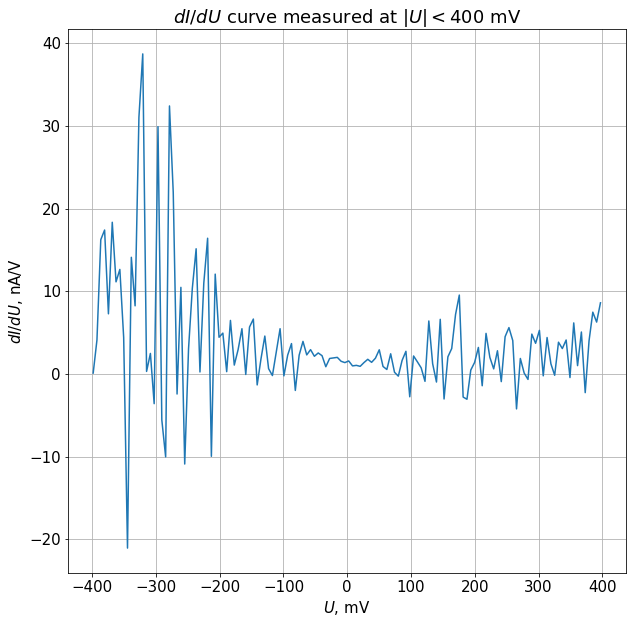

In [250]:
plt.figure(figsize=(10, 10))
#plt.plot(data_STS[:-1, 0], lfilter(b, a, res))
plt.plot(data_STS[:-1, 0][np.abs(data_STS[:-1, 0]) < 400], res[np.abs(data_STS[:-1, 0]) < 400] * 1000)

plt.xlabel('$U$, mV')
plt.ylabel('$dI/dU$, nA/V')

plt.title('$dI/dU$ curve measured at $|U| < 400$ mV')

plt.grid()

plt.savefig('Report/Pictures/3_curve.pdf')
plt.show()

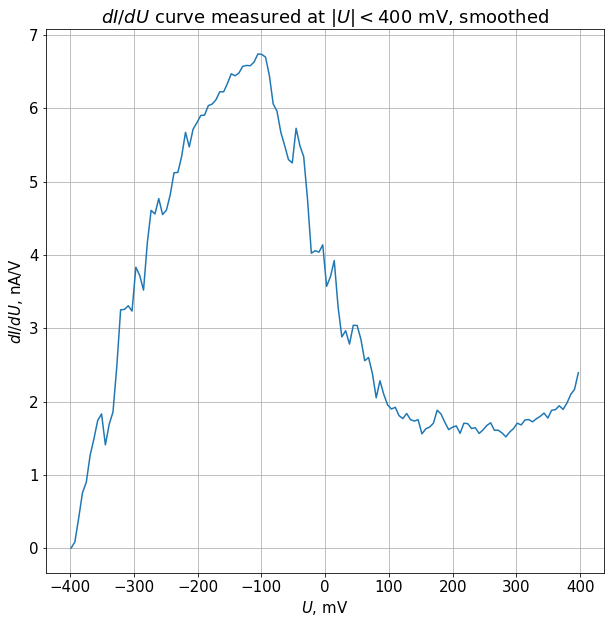

In [251]:
plt.figure(figsize=(10, 10))
#plt.plot(data_STS[:-1, 0], res))
plt.plot(data_STS[:-1, 0][np.abs(data_STS[:-1, 0]) < 400], lfilter(b, a, res[np.abs(data_STS[:-1, 0]) < 400] * 1000))

plt.xlabel('$U$, mV')
plt.ylabel('$dI/dU$, nA/V')

plt.title('$dI/dU$ curve measured at $|U| < 400$ mV, smoothed')

plt.grid()

plt.savefig('Report/Pictures/3_curve_smooth.pdf')
plt.show()